In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "moons" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space =6 #12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 4000 #4000
bias = [True,False]
use_bias = True

[2. 0. 0. 0. 0. 0.]


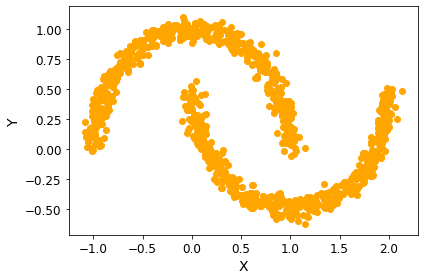

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [6]:
wgan = WGAN_Model_2D.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 1032      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 3,593
Trainable params: 3,493
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


In [8]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


## Training

In [9]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/4000
critic: 13.481318 - generator: -0.051308 - 6s
Epoch 2/4000
critic: 3.278163 - generator: -0.020020 - 0s
Epoch 3/4000
critic: 0.684748 - generator: -0.026294 - 0s
Epoch 4/4000
critic: 0.123253 - generator: -0.042541 - 0s
Epoch 5/4000
critic: 0.039504 - generator: -0.046014 - 0s
Epoch 6/4000
critic: 0.047062 - generator: -0.059295 - 0s
Epoch 7/4000
critic: 0.049912 - generator: -0.070746 - 0s
Epoch 8/4000
critic: 0.047559 - generator: -0.083113 - 0s
Epoch 9/4000
critic: 0.052278 - generator: -0.093552 - 0s
Epoch 10/4000
critic: 0.028983 - generator: -0.104340 - 0s
Epoch 11/4000
critic: 0.028031 - generator: -0.110403 - 0s
Epoch 12/4000
critic: 0.035568 - generator: -0.122349 - 0s
Epoch 13/4000
critic: 0.033563 - generator: -0.125812 - 0s
Epoch 14/4000
critic: 0.030942 - generator: -0.124750 - 0s
Epoch 15/4000
critic: 0.054222 - generator: -0.132245 - 0s
Epoch 16/4000
critic: 0.026574 - generator: -0.132140 - 0s
Epoch 17/4000
critic: 0.029551 - generator: -0.134416 - 0s
Epoch

critic: 0.026092 - generator: -0.126575 - 0s
Epoch 141/4000
critic: 0.024691 - generator: -0.126693 - 0s
Epoch 142/4000
critic: 0.026349 - generator: -0.128205 - 0s
Epoch 143/4000
critic: 0.021047 - generator: -0.127180 - 1s
Epoch 144/4000
critic: 0.018945 - generator: -0.122489 - 1s
Epoch 145/4000
critic: 0.022631 - generator: -0.125796 - 1s
Epoch 146/4000
critic: 0.016760 - generator: -0.124909 - 1s
Epoch 147/4000
critic: 0.014310 - generator: -0.124775 - 1s
Epoch 148/4000
critic: 0.025751 - generator: -0.122777 - 0s
Epoch 149/4000
critic: 0.019943 - generator: -0.122513 - 1s
Epoch 150/4000
critic: 0.010434 - generator: -0.118995 - 0s
Epoch 151/4000
critic: 0.035708 - generator: -0.123440 - 0s
Epoch 152/4000
critic: 0.023534 - generator: -0.123202 - 0s
Epoch 153/4000
critic: 0.021437 - generator: -0.123394 - 1s
Epoch 154/4000
critic: 0.028219 - generator: -0.124406 - 0s
Epoch 155/4000
critic: 0.018221 - generator: -0.130121 - 0s
Epoch 156/4000
critic: 0.018675 - generator: -0.124887 

critic: 0.025196 - generator: -0.150662 - 0s
Epoch 278/4000
critic: 0.014340 - generator: -0.149977 - 0s
Epoch 279/4000
critic: 0.024215 - generator: -0.151844 - 0s
Epoch 280/4000
critic: 0.019875 - generator: -0.155145 - 0s
Epoch 281/4000
critic: 0.013731 - generator: -0.157174 - 1s
Epoch 282/4000
critic: 0.009785 - generator: -0.153633 - 0s
Epoch 283/4000
critic: 0.015622 - generator: -0.156351 - 0s
Epoch 284/4000
critic: 0.023663 - generator: -0.159165 - 0s
Epoch 285/4000
critic: 0.020931 - generator: -0.157393 - 0s
Epoch 286/4000
critic: 0.022898 - generator: -0.154062 - 1s
Epoch 287/4000
critic: 0.013329 - generator: -0.154093 - 0s
Epoch 288/4000
critic: 0.012859 - generator: -0.159174 - 0s
Epoch 289/4000
critic: 0.015300 - generator: -0.158880 - 0s
Epoch 290/4000
critic: 0.022091 - generator: -0.158829 - 0s
Epoch 291/4000
critic: 0.016796 - generator: -0.159382 - 1s
Epoch 292/4000
critic: 0.018116 - generator: -0.159470 - 0s
Epoch 293/4000
critic: 0.020987 - generator: -0.160611 

critic: 0.014753 - generator: -0.131538 - 0s
Epoch 415/4000
critic: 0.013510 - generator: -0.135802 - 0s
Epoch 416/4000
critic: 0.016691 - generator: -0.137625 - 0s
Epoch 417/4000
critic: 0.011233 - generator: -0.137312 - 0s
Epoch 418/4000
critic: 0.017605 - generator: -0.136969 - 0s
Epoch 419/4000
critic: 0.014144 - generator: -0.134050 - 0s
Epoch 420/4000
critic: 0.018602 - generator: -0.133272 - 0s
Epoch 421/4000
critic: 0.014673 - generator: -0.136846 - 0s
Epoch 422/4000
critic: 0.010604 - generator: -0.135427 - 0s
Epoch 423/4000
critic: 0.016366 - generator: -0.138447 - 0s
Epoch 424/4000
critic: 0.019739 - generator: -0.140020 - 0s
Epoch 425/4000
critic: 0.014349 - generator: -0.140510 - 0s
Epoch 426/4000
critic: 0.014961 - generator: -0.141139 - 0s
Epoch 427/4000
critic: 0.019879 - generator: -0.145514 - 0s
Epoch 428/4000
critic: 0.017512 - generator: -0.146134 - 0s
Epoch 429/4000
critic: 0.011574 - generator: -0.141119 - 0s
Epoch 430/4000
critic: 0.013658 - generator: -0.143337 

critic: 0.015712 - generator: -0.112831 - 0s
Epoch 552/4000
critic: 0.018707 - generator: -0.115012 - 0s
Epoch 553/4000
critic: 0.017218 - generator: -0.116327 - 0s
Epoch 554/4000
critic: 0.015283 - generator: -0.114665 - 0s
Epoch 555/4000
critic: 0.020537 - generator: -0.112653 - 0s
Epoch 556/4000
critic: 0.013474 - generator: -0.111782 - 0s
Epoch 557/4000
critic: 0.018006 - generator: -0.110161 - 1s
Epoch 558/4000
critic: 0.020754 - generator: -0.109956 - 0s
Epoch 559/4000
critic: 0.009257 - generator: -0.110112 - 1s
Epoch 560/4000
critic: 0.015113 - generator: -0.111238 - 0s
Epoch 561/4000
critic: 0.011772 - generator: -0.107469 - 1s
Epoch 562/4000
critic: 0.011785 - generator: -0.107623 - 0s
Epoch 563/4000
critic: 0.011221 - generator: -0.104921 - 0s
Epoch 564/4000
critic: 0.013521 - generator: -0.107850 - 0s
Epoch 565/4000
critic: 0.015603 - generator: -0.102090 - 0s
Epoch 566/4000
critic: 0.014895 - generator: -0.106451 - 1s
Epoch 567/4000
critic: 0.012179 - generator: -0.105209 

critic: 0.009652 - generator: -0.100759 - 0s
Epoch 689/4000
critic: 0.013832 - generator: -0.101482 - 0s
Epoch 690/4000
critic: 0.016291 - generator: -0.099604 - 0s
Epoch 691/4000
critic: 0.008608 - generator: -0.101100 - 0s
Epoch 692/4000
critic: 0.010705 - generator: -0.098761 - 0s
Epoch 693/4000
critic: 0.011833 - generator: -0.097986 - 0s
Epoch 694/4000
critic: 0.011317 - generator: -0.099994 - 0s
Epoch 695/4000
critic: 0.016043 - generator: -0.097513 - 0s
Epoch 696/4000
critic: 0.016632 - generator: -0.096257 - 0s
Epoch 697/4000
critic: 0.015278 - generator: -0.099615 - 0s
Epoch 698/4000
critic: 0.020349 - generator: -0.093748 - 0s
Epoch 699/4000
critic: 0.011499 - generator: -0.093358 - 0s
Epoch 700/4000
critic: 0.017483 - generator: -0.094695 - 0s
Epoch 701/4000
critic: 0.015110 - generator: -0.100607 - 0s
Epoch 702/4000
critic: 0.018592 - generator: -0.104483 - 0s
Epoch 703/4000
critic: 0.015939 - generator: -0.100307 - 0s
Epoch 704/4000
critic: 0.013717 - generator: -0.097224 

critic: 0.015637 - generator: -0.086278 - 0s
Epoch 826/4000
critic: 0.011208 - generator: -0.085788 - 0s
Epoch 827/4000
critic: 0.018591 - generator: -0.084673 - 0s
Epoch 828/4000
critic: 0.014302 - generator: -0.084892 - 0s
Epoch 829/4000
critic: 0.012785 - generator: -0.082628 - 0s
Epoch 830/4000
critic: 0.012785 - generator: -0.078477 - 0s
Epoch 831/4000
critic: 0.014919 - generator: -0.082852 - 0s
Epoch 832/4000
critic: 0.012530 - generator: -0.085860 - 0s
Epoch 833/4000
critic: 0.012473 - generator: -0.084663 - 0s
Epoch 834/4000
critic: 0.015623 - generator: -0.086166 - 0s
Epoch 835/4000
critic: 0.008858 - generator: -0.083263 - 0s
Epoch 836/4000
critic: 0.014237 - generator: -0.084310 - 0s
Epoch 837/4000
critic: 0.015711 - generator: -0.079394 - 0s
Epoch 838/4000
critic: 0.016811 - generator: -0.082542 - 0s
Epoch 839/4000
critic: 0.018131 - generator: -0.086461 - 0s
Epoch 840/4000
critic: 0.010301 - generator: -0.087199 - 0s
Epoch 841/4000
critic: 0.013713 - generator: -0.086789 

critic: 0.013072 - generator: -0.081210 - 0s
Epoch 963/4000
critic: 0.013007 - generator: -0.083517 - 0s
Epoch 964/4000
critic: 0.015307 - generator: -0.083318 - 0s
Epoch 965/4000
critic: 0.011258 - generator: -0.084620 - 0s
Epoch 966/4000
critic: 0.011270 - generator: -0.087340 - 0s
Epoch 967/4000
critic: 0.015303 - generator: -0.083264 - 0s
Epoch 968/4000
critic: 0.020754 - generator: -0.082370 - 0s
Epoch 969/4000
critic: 0.014603 - generator: -0.086854 - 0s
Epoch 970/4000
critic: 0.018224 - generator: -0.076757 - 0s
Epoch 971/4000
critic: 0.015962 - generator: -0.074473 - 0s
Epoch 972/4000
critic: 0.011191 - generator: -0.071438 - 0s
Epoch 973/4000
critic: 0.013055 - generator: -0.070108 - 0s
Epoch 974/4000
critic: 0.014968 - generator: -0.076158 - 0s
Epoch 975/4000
critic: 0.009462 - generator: -0.074950 - 0s
Epoch 976/4000
critic: 0.007136 - generator: -0.078487 - 0s
Epoch 977/4000
critic: 0.017656 - generator: -0.081513 - 0s
Epoch 978/4000
critic: 0.010672 - generator: -0.078264 

critic: 0.010714 - generator: -0.089418 - 0s
Epoch 1098/4000
critic: 0.012043 - generator: -0.087935 - 0s
Epoch 1099/4000
critic: 0.010852 - generator: -0.091719 - 0s
Epoch 1100/4000
critic: 0.006548 - generator: -0.091143 - 0s
Epoch 1101/4000
critic: 0.010208 - generator: -0.092877 - 0s
Epoch 1102/4000
critic: 0.007623 - generator: -0.092601 - 0s
Epoch 1103/4000
critic: 0.010774 - generator: -0.096840 - 0s
Epoch 1104/4000
critic: 0.005980 - generator: -0.100332 - 0s
Epoch 1105/4000
critic: 0.013956 - generator: -0.094687 - 0s
Epoch 1106/4000
critic: 0.015080 - generator: -0.101651 - 0s
Epoch 1107/4000
critic: 0.013715 - generator: -0.097089 - 0s
Epoch 1108/4000
critic: 0.014326 - generator: -0.095118 - 0s
Epoch 1109/4000
critic: 0.010428 - generator: -0.099650 - 0s
Epoch 1110/4000
critic: 0.007775 - generator: -0.100027 - 0s
Epoch 1111/4000
critic: 0.007951 - generator: -0.098365 - 0s
Epoch 1112/4000
critic: 0.014849 - generator: -0.095957 - 0s
Epoch 1113/4000
critic: 0.009843 - gener

critic: 0.008131 - generator: -0.100705 - 0s
Epoch 1233/4000
critic: 0.010880 - generator: -0.098017 - 0s
Epoch 1234/4000
critic: 0.010500 - generator: -0.099690 - 0s
Epoch 1235/4000
critic: 0.010854 - generator: -0.101095 - 0s
Epoch 1236/4000
critic: 0.007421 - generator: -0.101249 - 0s
Epoch 1237/4000
critic: 0.013739 - generator: -0.106594 - 0s
Epoch 1238/4000
critic: 0.016984 - generator: -0.103191 - 0s
Epoch 1239/4000
critic: 0.012808 - generator: -0.103103 - 0s
Epoch 1240/4000
critic: 0.009877 - generator: -0.104225 - 0s
Epoch 1241/4000
critic: 0.009204 - generator: -0.102911 - 0s
Epoch 1242/4000
critic: 0.011084 - generator: -0.099824 - 0s
Epoch 1243/4000
critic: 0.012568 - generator: -0.101629 - 0s
Epoch 1244/4000
critic: 0.011331 - generator: -0.097997 - 0s
Epoch 1245/4000
critic: 0.011700 - generator: -0.100855 - 0s
Epoch 1246/4000
critic: 0.009237 - generator: -0.103951 - 0s
Epoch 1247/4000
critic: 0.007461 - generator: -0.105777 - 0s
Epoch 1248/4000
critic: 0.011188 - gener

critic: 0.008867 - generator: -0.119817 - 0s
Epoch 1368/4000
critic: 0.010821 - generator: -0.121205 - 0s
Epoch 1369/4000
critic: 0.011981 - generator: -0.119404 - 0s
Epoch 1370/4000
critic: 0.010407 - generator: -0.119950 - 0s
Epoch 1371/4000
critic: 0.006055 - generator: -0.122365 - 0s
Epoch 1372/4000
critic: 0.008092 - generator: -0.118799 - 0s
Epoch 1373/4000
critic: 0.005097 - generator: -0.121927 - 0s
Epoch 1374/4000
critic: 0.011573 - generator: -0.123042 - 0s
Epoch 1375/4000
critic: 0.007335 - generator: -0.120681 - 0s
Epoch 1376/4000
critic: 0.011258 - generator: -0.118816 - 0s
Epoch 1377/4000
critic: 0.010885 - generator: -0.118300 - 0s
Epoch 1378/4000
critic: 0.010591 - generator: -0.116465 - 0s
Epoch 1379/4000
critic: 0.008096 - generator: -0.115514 - 0s
Epoch 1380/4000
critic: 0.009154 - generator: -0.115181 - 0s
Epoch 1381/4000
critic: 0.010502 - generator: -0.119729 - 0s
Epoch 1382/4000
critic: 0.013904 - generator: -0.114463 - 0s
Epoch 1383/4000
critic: 0.010425 - gener

critic: 0.008588 - generator: -0.115047 - 0s
Epoch 1503/4000
critic: 0.009629 - generator: -0.114909 - 0s
Epoch 1504/4000
critic: 0.004970 - generator: -0.112503 - 0s
Epoch 1505/4000
critic: 0.009135 - generator: -0.112286 - 0s
Epoch 1506/4000
critic: 0.013712 - generator: -0.115141 - 0s
Epoch 1507/4000
critic: 0.010109 - generator: -0.116244 - 0s
Epoch 1508/4000
critic: 0.010056 - generator: -0.120633 - 0s
Epoch 1509/4000
critic: 0.012807 - generator: -0.117760 - 0s
Epoch 1510/4000
critic: 0.008798 - generator: -0.115182 - 0s
Epoch 1511/4000
critic: 0.011459 - generator: -0.115347 - 0s
Epoch 1512/4000
critic: 0.011067 - generator: -0.119332 - 0s
Epoch 1513/4000
critic: 0.009232 - generator: -0.118090 - 0s
Epoch 1514/4000
critic: 0.007069 - generator: -0.118455 - 0s
Epoch 1515/4000
critic: 0.009009 - generator: -0.116400 - 0s
Epoch 1516/4000
critic: 0.010311 - generator: -0.118145 - 0s
Epoch 1517/4000
critic: 0.007193 - generator: -0.114910 - 0s
Epoch 1518/4000
critic: 0.006928 - gener

critic: 0.008997 - generator: -0.124858 - 0s
Epoch 1638/4000
critic: 0.009427 - generator: -0.128867 - 0s
Epoch 1639/4000
critic: 0.012517 - generator: -0.127203 - 0s
Epoch 1640/4000
critic: 0.006819 - generator: -0.126239 - 0s
Epoch 1641/4000
critic: 0.013951 - generator: -0.127632 - 0s
Epoch 1642/4000
critic: 0.011010 - generator: -0.129949 - 0s
Epoch 1643/4000
critic: 0.009533 - generator: -0.125403 - 0s
Epoch 1644/4000
critic: 0.013208 - generator: -0.128981 - 0s
Epoch 1645/4000
critic: 0.007028 - generator: -0.125699 - 0s
Epoch 1646/4000
critic: 0.012328 - generator: -0.124573 - 0s
Epoch 1647/4000
critic: 0.007633 - generator: -0.127563 - 0s
Epoch 1648/4000
critic: 0.007814 - generator: -0.129421 - 0s
Epoch 1649/4000
critic: 0.010124 - generator: -0.127566 - 0s
Epoch 1650/4000
critic: 0.011048 - generator: -0.127495 - 0s
Epoch 1651/4000
critic: 0.008962 - generator: -0.132877 - 0s
Epoch 1652/4000
critic: 0.011099 - generator: -0.129683 - 0s
Epoch 1653/4000
critic: 0.010116 - gener

critic: 0.009467 - generator: -0.143442 - 0s
Epoch 1773/4000
critic: 0.005920 - generator: -0.144419 - 0s
Epoch 1774/4000
critic: 0.008390 - generator: -0.144434 - 0s
Epoch 1775/4000
critic: 0.006011 - generator: -0.148250 - 0s
Epoch 1776/4000
critic: 0.014679 - generator: -0.145309 - 0s
Epoch 1777/4000
critic: 0.012058 - generator: -0.147328 - 0s
Epoch 1778/4000
critic: 0.009446 - generator: -0.149662 - 0s
Epoch 1779/4000
critic: 0.011295 - generator: -0.147087 - 0s
Epoch 1780/4000
critic: 0.011485 - generator: -0.147367 - 0s
Epoch 1781/4000
critic: 0.009737 - generator: -0.148853 - 0s
Epoch 1782/4000
critic: 0.011041 - generator: -0.151022 - 0s
Epoch 1783/4000
critic: 0.013741 - generator: -0.153214 - 0s
Epoch 1784/4000
critic: 0.010160 - generator: -0.151821 - 0s
Epoch 1785/4000
critic: 0.005598 - generator: -0.150463 - 0s
Epoch 1786/4000
critic: 0.012548 - generator: -0.150927 - 0s
Epoch 1787/4000
critic: 0.011563 - generator: -0.153564 - 0s
Epoch 1788/4000
critic: 0.010966 - gener

critic: 0.011972 - generator: -0.141567 - 0s
Epoch 1908/4000
critic: 0.013312 - generator: -0.145447 - 0s
Epoch 1909/4000
critic: 0.006764 - generator: -0.146145 - 0s
Epoch 1910/4000
critic: 0.011777 - generator: -0.146383 - 0s
Epoch 1911/4000
critic: 0.006553 - generator: -0.143808 - 0s
Epoch 1912/4000
critic: 0.012041 - generator: -0.145306 - 0s
Epoch 1913/4000
critic: 0.012680 - generator: -0.146596 - 0s
Epoch 1914/4000
critic: 0.015057 - generator: -0.145151 - 0s
Epoch 1915/4000
critic: 0.012668 - generator: -0.144579 - 0s
Epoch 1916/4000
critic: 0.014039 - generator: -0.140702 - 0s
Epoch 1917/4000
critic: 0.012142 - generator: -0.143965 - 0s
Epoch 1918/4000
critic: 0.010469 - generator: -0.143049 - 0s
Epoch 1919/4000
critic: 0.006202 - generator: -0.142436 - 0s
Epoch 1920/4000
critic: 0.013382 - generator: -0.146307 - 0s
Epoch 1921/4000
critic: 0.009817 - generator: -0.147731 - 0s
Epoch 1922/4000
critic: 0.008256 - generator: -0.150725 - 0s
Epoch 1923/4000
critic: 0.010409 - gener

critic: 0.007496 - generator: -0.153970 - 0s
Epoch 2043/4000
critic: 0.009400 - generator: -0.154089 - 0s
Epoch 2044/4000
critic: 0.006046 - generator: -0.156250 - 0s
Epoch 2045/4000
critic: 0.007859 - generator: -0.153878 - 0s
Epoch 2046/4000
critic: 0.005882 - generator: -0.155805 - 0s
Epoch 2047/4000
critic: 0.007627 - generator: -0.154955 - 0s
Epoch 2048/4000
critic: 0.010938 - generator: -0.157834 - 0s
Epoch 2049/4000
critic: 0.013272 - generator: -0.152960 - 0s
Epoch 2050/4000
critic: 0.009589 - generator: -0.157596 - 0s
Epoch 2051/4000
critic: 0.006228 - generator: -0.158746 - 0s
Epoch 2052/4000
critic: 0.007423 - generator: -0.160963 - 0s
Epoch 2053/4000
critic: 0.008330 - generator: -0.160002 - 0s
Epoch 2054/4000
critic: 0.006657 - generator: -0.156589 - 0s
Epoch 2055/4000
critic: 0.011384 - generator: -0.155969 - 0s
Epoch 2056/4000
critic: 0.012134 - generator: -0.155831 - 0s
Epoch 2057/4000
critic: 0.009604 - generator: -0.157530 - 0s
Epoch 2058/4000
critic: 0.011233 - gener

critic: 0.012390 - generator: -0.173035 - 0s
Epoch 2178/4000
critic: 0.011856 - generator: -0.172856 - 0s
Epoch 2179/4000
critic: 0.006847 - generator: -0.170872 - 0s
Epoch 2180/4000
critic: 0.005809 - generator: -0.172949 - 0s
Epoch 2181/4000
critic: 0.010642 - generator: -0.171849 - 0s
Epoch 2182/4000
critic: 0.008006 - generator: -0.168554 - 0s
Epoch 2183/4000
critic: 0.011381 - generator: -0.169427 - 0s
Epoch 2184/4000
critic: 0.008768 - generator: -0.172774 - 0s
Epoch 2185/4000
critic: 0.008571 - generator: -0.168889 - 0s
Epoch 2186/4000
critic: 0.007690 - generator: -0.171024 - 0s
Epoch 2187/4000
critic: 0.007187 - generator: -0.168803 - 0s
Epoch 2188/4000
critic: 0.011631 - generator: -0.166522 - 0s
Epoch 2189/4000
critic: 0.011960 - generator: -0.163633 - 0s
Epoch 2190/4000
critic: 0.011433 - generator: -0.166447 - 0s
Epoch 2191/4000
critic: 0.010580 - generator: -0.170637 - 0s
Epoch 2192/4000
critic: 0.005053 - generator: -0.164944 - 0s
Epoch 2193/4000
critic: 0.006544 - gener

critic: 0.009499 - generator: -0.173339 - 0s
Epoch 2313/4000
critic: 0.006963 - generator: -0.172330 - 0s
Epoch 2314/4000
critic: 0.006830 - generator: -0.165869 - 0s
Epoch 2315/4000
critic: 0.008891 - generator: -0.171406 - 0s
Epoch 2316/4000
critic: 0.012709 - generator: -0.172593 - 0s
Epoch 2317/4000
critic: 0.010606 - generator: -0.174507 - 0s
Epoch 2318/4000
critic: 0.009391 - generator: -0.172481 - 0s
Epoch 2319/4000
critic: 0.013954 - generator: -0.172030 - 0s
Epoch 2320/4000
critic: 0.010572 - generator: -0.174390 - 0s
Epoch 2321/4000
critic: 0.006140 - generator: -0.172956 - 0s
Epoch 2322/4000
critic: 0.009706 - generator: -0.168259 - 0s
Epoch 2323/4000
critic: 0.007120 - generator: -0.166835 - 0s
Epoch 2324/4000
critic: 0.011531 - generator: -0.164593 - 0s
Epoch 2325/4000
critic: 0.011164 - generator: -0.168272 - 0s
Epoch 2326/4000
critic: 0.010648 - generator: -0.169661 - 0s
Epoch 2327/4000
critic: 0.009365 - generator: -0.170971 - 0s
Epoch 2328/4000
critic: 0.014534 - gener

critic: 0.012064 - generator: -0.157121 - 0s
Epoch 2448/4000
critic: 0.007291 - generator: -0.159583 - 0s
Epoch 2449/4000
critic: 0.015582 - generator: -0.155819 - 0s
Epoch 2450/4000
critic: 0.009291 - generator: -0.158281 - 0s
Epoch 2451/4000
critic: 0.015622 - generator: -0.155795 - 0s
Epoch 2452/4000
critic: 0.009769 - generator: -0.156033 - 0s
Epoch 2453/4000
critic: 0.007180 - generator: -0.153635 - 0s
Epoch 2454/4000
critic: 0.010050 - generator: -0.151382 - 0s
Epoch 2455/4000
critic: 0.009454 - generator: -0.155703 - 0s
Epoch 2456/4000
critic: 0.012897 - generator: -0.154199 - 0s
Epoch 2457/4000
critic: 0.008857 - generator: -0.154449 - 0s
Epoch 2458/4000
critic: 0.007096 - generator: -0.160385 - 0s
Epoch 2459/4000
critic: 0.007742 - generator: -0.155789 - 0s
Epoch 2460/4000
critic: 0.008619 - generator: -0.161462 - 0s
Epoch 2461/4000
critic: 0.013046 - generator: -0.160840 - 0s
Epoch 2462/4000
critic: 0.020918 - generator: -0.163622 - 0s
Epoch 2463/4000
critic: 0.010587 - gener

critic: 0.007643 - generator: -0.165240 - 0s
Epoch 2583/4000
critic: 0.006381 - generator: -0.165459 - 0s
Epoch 2584/4000
critic: 0.009508 - generator: -0.164534 - 0s
Epoch 2585/4000
critic: 0.008330 - generator: -0.168571 - 0s
Epoch 2586/4000
critic: 0.015500 - generator: -0.168264 - 0s
Epoch 2587/4000
critic: 0.012198 - generator: -0.168640 - 0s
Epoch 2588/4000
critic: 0.014338 - generator: -0.165098 - 0s
Epoch 2589/4000
critic: 0.008434 - generator: -0.163887 - 0s
Epoch 2590/4000
critic: 0.011218 - generator: -0.162322 - 0s
Epoch 2591/4000
critic: 0.014162 - generator: -0.166374 - 0s
Epoch 2592/4000
critic: 0.010534 - generator: -0.165858 - 0s
Epoch 2593/4000
critic: 0.009983 - generator: -0.168578 - 0s
Epoch 2594/4000
critic: 0.014728 - generator: -0.163357 - 0s
Epoch 2595/4000
critic: 0.007935 - generator: -0.167291 - 0s
Epoch 2596/4000
critic: 0.007097 - generator: -0.163195 - 0s
Epoch 2597/4000
critic: 0.009090 - generator: -0.164519 - 0s
Epoch 2598/4000
critic: 0.008558 - gener

critic: 0.009202 - generator: -0.164939 - 1s
Epoch 2718/4000
critic: 0.013415 - generator: -0.170328 - 0s
Epoch 2719/4000
critic: 0.005916 - generator: -0.165043 - 1s
Epoch 2720/4000
critic: 0.008301 - generator: -0.166077 - 0s
Epoch 2721/4000
critic: 0.010311 - generator: -0.163610 - 1s
Epoch 2722/4000
critic: 0.013696 - generator: -0.165515 - 1s
Epoch 2723/4000
critic: 0.012240 - generator: -0.163482 - 1s
Epoch 2724/4000
critic: 0.013011 - generator: -0.165035 - 0s
Epoch 2725/4000
critic: 0.007794 - generator: -0.163817 - 0s
Epoch 2726/4000
critic: 0.013852 - generator: -0.163456 - 0s
Epoch 2727/4000
critic: 0.008573 - generator: -0.167627 - 1s
Epoch 2728/4000
critic: 0.008466 - generator: -0.161626 - 0s
Epoch 2729/4000
critic: 0.008374 - generator: -0.168640 - 1s
Epoch 2730/4000
critic: 0.006385 - generator: -0.163088 - 0s
Epoch 2731/4000
critic: 0.010981 - generator: -0.159697 - 0s
Epoch 2732/4000
critic: 0.011568 - generator: -0.164581 - 0s
Epoch 2733/4000
critic: 0.011067 - gener

critic: 0.007811 - generator: -0.154708 - 1s
Epoch 2853/4000
critic: 0.006488 - generator: -0.152042 - 1s
Epoch 2854/4000
critic: 0.018952 - generator: -0.152252 - 0s
Epoch 2855/4000
critic: 0.004466 - generator: -0.152876 - 1s
Epoch 2856/4000
critic: 0.010878 - generator: -0.154708 - 1s
Epoch 2857/4000
critic: 0.011263 - generator: -0.151404 - 0s
Epoch 2858/4000
critic: 0.007743 - generator: -0.156221 - 0s
Epoch 2859/4000
critic: 0.015151 - generator: -0.153783 - 0s
Epoch 2860/4000
critic: 0.008964 - generator: -0.151464 - 1s
Epoch 2861/4000
critic: 0.008261 - generator: -0.156317 - 1s
Epoch 2862/4000
critic: 0.009446 - generator: -0.154145 - 1s
Epoch 2863/4000
critic: 0.011147 - generator: -0.153857 - 0s
Epoch 2864/4000
critic: 0.012830 - generator: -0.153433 - 1s
Epoch 2865/4000
critic: 0.009925 - generator: -0.150341 - 0s
Epoch 2866/4000
critic: 0.006607 - generator: -0.152544 - 0s
Epoch 2867/4000
critic: 0.013402 - generator: -0.154614 - 0s
Epoch 2868/4000
critic: 0.012661 - gener

critic: 0.008528 - generator: -0.151505 - 0s
Epoch 2988/4000
critic: 0.011813 - generator: -0.151130 - 0s
Epoch 2989/4000
critic: 0.012942 - generator: -0.150212 - 0s
Epoch 2990/4000
critic: 0.007681 - generator: -0.151185 - 0s
Epoch 2991/4000
critic: 0.007262 - generator: -0.154576 - 0s
Epoch 2992/4000
critic: 0.010231 - generator: -0.154952 - 0s
Epoch 2993/4000
critic: 0.013012 - generator: -0.151074 - 0s
Epoch 2994/4000
critic: 0.006269 - generator: -0.151804 - 0s
Epoch 2995/4000
critic: 0.017499 - generator: -0.147755 - 0s
Epoch 2996/4000
critic: 0.010253 - generator: -0.150110 - 1s
Epoch 2997/4000
critic: 0.010239 - generator: -0.149567 - 0s
Epoch 2998/4000
critic: 0.010623 - generator: -0.151128 - 0s
Epoch 2999/4000
critic: 0.011114 - generator: -0.147899 - 0s
Epoch 3000/4000
critic: 0.007561 - generator: -0.153143 - 1s
Epoch 3001/4000
critic: 0.008651 - generator: -0.152770 - 0s
Epoch 3002/4000
critic: 0.010010 - generator: -0.148870 - 1s
Epoch 3003/4000
critic: 0.008012 - gener

critic: 0.011227 - generator: -0.136293 - 0s
Epoch 3123/4000
critic: 0.018133 - generator: -0.134951 - 0s
Epoch 3124/4000
critic: 0.013184 - generator: -0.136491 - 1s
Epoch 3125/4000
critic: 0.011730 - generator: -0.140952 - 0s
Epoch 3126/4000
critic: 0.007423 - generator: -0.139182 - 0s
Epoch 3127/4000
critic: 0.006590 - generator: -0.137216 - 0s
Epoch 3128/4000
critic: 0.010253 - generator: -0.140588 - 0s
Epoch 3129/4000
critic: 0.005940 - generator: -0.143795 - 0s
Epoch 3130/4000
critic: 0.006592 - generator: -0.143282 - 0s
Epoch 3131/4000
critic: 0.010338 - generator: -0.142474 - 0s
Epoch 3132/4000
critic: 0.010263 - generator: -0.137785 - 0s
Epoch 3133/4000
critic: 0.010152 - generator: -0.141842 - 0s
Epoch 3134/4000
critic: 0.012199 - generator: -0.136227 - 0s
Epoch 3135/4000
critic: 0.014481 - generator: -0.137928 - 0s
Epoch 3136/4000
critic: 0.010716 - generator: -0.140044 - 0s
Epoch 3137/4000
critic: 0.008974 - generator: -0.138671 - 0s
Epoch 3138/4000
critic: 0.009996 - gener

critic: 0.007096 - generator: -0.148892 - 0s
Epoch 3258/4000
critic: 0.013941 - generator: -0.152915 - 0s
Epoch 3259/4000
critic: 0.010565 - generator: -0.151065 - 0s
Epoch 3260/4000
critic: 0.011142 - generator: -0.155721 - 0s
Epoch 3261/4000
critic: 0.008624 - generator: -0.154925 - 0s
Epoch 3262/4000
critic: 0.005242 - generator: -0.154738 - 0s
Epoch 3263/4000
critic: 0.007153 - generator: -0.153389 - 0s
Epoch 3264/4000
critic: 0.006604 - generator: -0.155059 - 0s
Epoch 3265/4000
critic: 0.011079 - generator: -0.153926 - 0s
Epoch 3266/4000
critic: 0.008563 - generator: -0.155463 - 0s
Epoch 3267/4000
critic: 0.008138 - generator: -0.157322 - 0s
Epoch 3268/4000
critic: 0.015946 - generator: -0.157019 - 0s
Epoch 3269/4000
critic: 0.008475 - generator: -0.157568 - 0s
Epoch 3270/4000
critic: 0.011779 - generator: -0.156024 - 0s
Epoch 3271/4000
critic: 0.008566 - generator: -0.158965 - 0s
Epoch 3272/4000
critic: 0.008906 - generator: -0.155350 - 0s
Epoch 3273/4000
critic: 0.008993 - gener

critic: 0.005718 - generator: -0.152996 - 0s
Epoch 3393/4000
critic: 0.008866 - generator: -0.148424 - 0s
Epoch 3394/4000
critic: 0.009343 - generator: -0.147439 - 0s
Epoch 3395/4000
critic: 0.011088 - generator: -0.147358 - 0s
Epoch 3396/4000
critic: 0.008096 - generator: -0.149131 - 1s
Epoch 3397/4000
critic: 0.009282 - generator: -0.144286 - 0s
Epoch 3398/4000
critic: 0.010941 - generator: -0.144936 - 1s
Epoch 3399/4000
critic: 0.013685 - generator: -0.147135 - 0s
Epoch 3400/4000
critic: 0.009698 - generator: -0.146197 - 0s
Epoch 3401/4000
critic: 0.010570 - generator: -0.144722 - 0s
Epoch 3402/4000
critic: 0.008606 - generator: -0.142849 - 0s
Epoch 3403/4000
critic: 0.008190 - generator: -0.142031 - 0s
Epoch 3404/4000
critic: 0.012560 - generator: -0.147895 - 0s
Epoch 3405/4000
critic: 0.009711 - generator: -0.149881 - 0s
Epoch 3406/4000
critic: 0.013891 - generator: -0.145898 - 0s
Epoch 3407/4000
critic: 0.010040 - generator: -0.145353 - 0s
Epoch 3408/4000
critic: 0.008279 - gener

critic: 0.010054 - generator: -0.155034 - 0s
Epoch 3528/4000
critic: 0.008633 - generator: -0.151455 - 1s
Epoch 3529/4000
critic: 0.010152 - generator: -0.156109 - 0s
Epoch 3530/4000
critic: 0.009107 - generator: -0.155718 - 0s
Epoch 3531/4000
critic: 0.009562 - generator: -0.155340 - 0s
Epoch 3532/4000
critic: 0.009134 - generator: -0.154549 - 0s
Epoch 3533/4000
critic: 0.011516 - generator: -0.156781 - 0s
Epoch 3534/4000
critic: 0.010932 - generator: -0.155093 - 0s
Epoch 3535/4000
critic: 0.013054 - generator: -0.150870 - 0s
Epoch 3536/4000
critic: 0.004073 - generator: -0.148138 - 0s
Epoch 3537/4000
critic: 0.007904 - generator: -0.151353 - 1s
Epoch 3538/4000
critic: 0.006760 - generator: -0.148188 - 0s
Epoch 3539/4000
critic: 0.007312 - generator: -0.147237 - 1s
Epoch 3540/4000
critic: 0.006407 - generator: -0.139821 - 0s
Epoch 3541/4000
critic: 0.011422 - generator: -0.142509 - 1s
Epoch 3542/4000
critic: 0.008058 - generator: -0.144318 - 1s
Epoch 3543/4000
critic: 0.004661 - gener

critic: 0.005068 - generator: -0.154673 - 0s
Epoch 3663/4000
critic: 0.009455 - generator: -0.161072 - 1s
Epoch 3664/4000
critic: 0.009726 - generator: -0.160899 - 0s
Epoch 3665/4000
critic: 0.014024 - generator: -0.159451 - 0s
Epoch 3666/4000
critic: 0.006723 - generator: -0.155765 - 0s
Epoch 3667/4000
critic: 0.009958 - generator: -0.153906 - 0s
Epoch 3668/4000
critic: 0.009302 - generator: -0.149478 - 0s
Epoch 3669/4000
critic: 0.007081 - generator: -0.148409 - 0s
Epoch 3670/4000
critic: 0.010940 - generator: -0.154259 - 0s
Epoch 3671/4000
critic: 0.014551 - generator: -0.155522 - 0s
Epoch 3672/4000
critic: 0.009756 - generator: -0.157271 - 1s
Epoch 3673/4000
critic: 0.009793 - generator: -0.155256 - 0s
Epoch 3674/4000
critic: 0.008677 - generator: -0.156621 - 0s
Epoch 3675/4000
critic: 0.009140 - generator: -0.154878 - 0s
Epoch 3676/4000
critic: 0.006148 - generator: -0.152151 - 0s
Epoch 3677/4000
critic: 0.010326 - generator: -0.154591 - 0s
Epoch 3678/4000
critic: 0.008069 - gener

critic: 0.005618 - generator: -0.156763 - 0s
Epoch 3798/4000
critic: 0.008469 - generator: -0.159548 - 0s
Epoch 3799/4000
critic: 0.008995 - generator: -0.154406 - 0s
Epoch 3800/4000
critic: 0.013432 - generator: -0.154359 - 0s
Epoch 3801/4000
critic: 0.007133 - generator: -0.159639 - 0s
Epoch 3802/4000
critic: 0.009956 - generator: -0.152935 - 0s
Epoch 3803/4000
critic: 0.008636 - generator: -0.158084 - 1s
Epoch 3804/4000
critic: 0.008185 - generator: -0.153722 - 0s
Epoch 3805/4000
critic: 0.005865 - generator: -0.158831 - 0s
Epoch 3806/4000
critic: 0.004479 - generator: -0.157685 - 0s
Epoch 3807/4000
critic: 0.005019 - generator: -0.149986 - 0s
Epoch 3808/4000
critic: 0.010371 - generator: -0.154040 - 0s
Epoch 3809/4000
critic: 0.010769 - generator: -0.156325 - 1s
Epoch 3810/4000
critic: 0.015336 - generator: -0.152952 - 0s
Epoch 3811/4000
critic: 0.007110 - generator: -0.155328 - 0s
Epoch 3812/4000
critic: 0.009305 - generator: -0.153607 - 0s
Epoch 3813/4000
critic: 0.006733 - gener

critic: 0.008921 - generator: -0.148705 - 0s
Epoch 3933/4000
critic: 0.009314 - generator: -0.148736 - 0s
Epoch 3934/4000
critic: 0.009848 - generator: -0.146100 - 0s
Epoch 3935/4000
critic: 0.009221 - generator: -0.149514 - 0s
Epoch 3936/4000
critic: 0.008608 - generator: -0.146951 - 0s
Epoch 3937/4000
critic: 0.006757 - generator: -0.149405 - 0s
Epoch 3938/4000
critic: 0.010797 - generator: -0.147854 - 0s
Epoch 3939/4000
critic: 0.009745 - generator: -0.146673 - 0s
Epoch 3940/4000
critic: 0.008890 - generator: -0.148326 - 0s
Epoch 3941/4000
critic: 0.006544 - generator: -0.145292 - 0s
Epoch 3942/4000
critic: 0.004479 - generator: -0.150074 - 0s
Epoch 3943/4000
critic: 0.008643 - generator: -0.149728 - 0s
Epoch 3944/4000
critic: 0.007727 - generator: -0.151933 - 0s
Epoch 3945/4000
critic: 0.007505 - generator: -0.148689 - 0s
Epoch 3946/4000
critic: 0.006672 - generator: -0.146725 - 0s
Epoch 3947/4000
critic: 0.008199 - generator: -0.146206 - 0s
Epoch 3948/4000
critic: 0.007033 - gener

#### plot loss

Loss: 


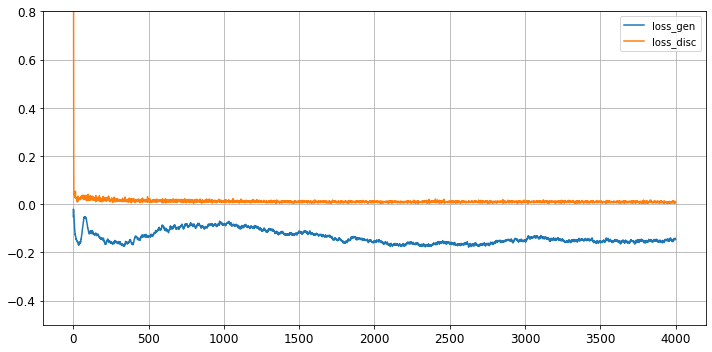

In [10]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [11]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### Sampleing from the latent space

Predicted Values: (1000, 2)


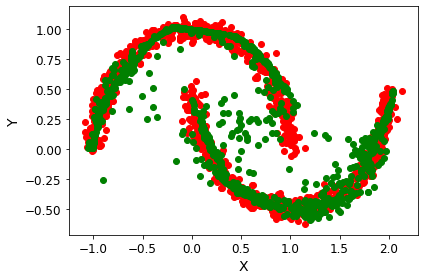

In [12]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

In [13]:
os.system('mkdir result_dataset')

export_excel(predicted_values[:,:], 'result_dataset/predicted_values')
#x=[:0],y=[:1],z=[:2]

print('made result_Dataset')


made result_Dataset


In [14]:
if n_features == 3:    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='green')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='green')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()

### Applying the prediction function

## Fixed Input

input_test : (900, 2)


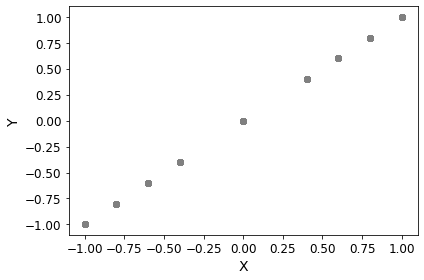

In [15]:
# define these for desired prediction
x_input = [-1,-0.8,-0.6,-0.4,0,0.4,0.6,0.8,1]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
#predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [16]:
X_generated = wgan.predict(input_test, scaler)

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)


Generated Data: (899, 2)


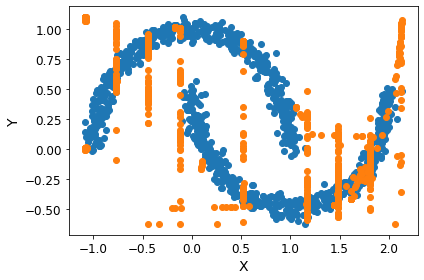

In [17]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()